In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#

     |████████████████████████████████| 71kB 6.6MB/s 


In [2]:
dataset = pd.read_csv("City_day.csv");

dataset.dropna(axis=0, subset = ["Air_quality", "Xylene", "AQI", "Toluene",
                                  "Benzene", "O3", "SO2", "CO", "NH3", "NOx", 
                                  "NO2", "PM10", "PM2.5", "NO"], how = 'all', inplace= True)
dataset.dropna(subset = ["Air_quality"], inplace=True)
      
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,15].values

print(dataset.head())

         City       Date   PM2.5  PM10  ...  Toluene  Xylene    AQI  Air_quality
28  Ahmedabad  1/29/2015   83.13   NaN  ...     0.00    3.14  209.0         Poor
29  Ahmedabad  1/30/2015   79.84   NaN  ...     0.00    4.81  328.0    Very Poor
30  Ahmedabad  1/31/2015   94.52   NaN  ...     0.01    7.67  514.0       Severe
31  Ahmedabad   2/1/2015  135.99   NaN  ...     0.04   25.87  782.0       Severe
32  Ahmedabad   2/2/2015  178.33   NaN  ...     0.06   35.61  914.0       Severe

[5 rows x 16 columns]


In [3]:
dataset.isnull().sum()

City               0
Date               0
PM2.5            635
PM10            6975
NO               308
NO2              305
NOx             1785
NH3             6323
CO               416
SO2              554
O3               709
Benzene         3270
Toluene         5435
Xylene         14208
AQI                0
Air_quality        0
dtype: int64

In [4]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer = imputer.fit(x[:,2:15])
x[:,2:15] = imputer.transform(x[:,2:15])

In [5]:
le_X_city = LabelEncoder()
le_X_date = LabelEncoder()
le_Y = LabelEncoder()
y = le_Y.fit_transform(y)

x[:,0] = le_X_city.fit_transform(x[:,0])
x[:,1] = le_X_date.fit_transform(x[:,1])

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21937 entries, 28 to 26218
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         21937 non-null  object 
 1   Date         21937 non-null  object 
 2   PM2.5        21302 non-null  float64
 3   PM10         14962 non-null  float64
 4   NO           21629 non-null  float64
 5   NO2          21632 non-null  float64
 6   NOx          20152 non-null  float64
 7   NH3          15614 non-null  float64
 8   CO           21521 non-null  float64
 9   SO2          21383 non-null  float64
 10  O3           21228 non-null  float64
 11  Benzene      18667 non-null  float64
 12  Toluene      16502 non-null  float64
 13  Xylene       7729 non-null   float64
 14  AQI          21937 non-null  float64
 15  Air_quality  21937 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.8+ MB


In [8]:
dataset.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21302.000000,14962.000000,21629.000000,21632.000000,20152.000000,15614.000000,21521.000000,21383.000000,21228.000000,18667.000000,16502.000000,7729.000000,21937.000000
mean,71.819536,125.867953,18.336627,29.537978,33.470678,25.751801,2.552130,14.801633,34.833688,3.465744,9.910826,3.741817,175.840908
std,65.402215,93.019867,22.987785,25.341563,31.934069,27.323008,7.508587,18.342644,21.432535,16.922770,22.126794,7.134129,146.143064
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.100000,0.000000,0.000000,0.000000,13.000000
25%,31.670000,61.692500,5.950000,12.100000,13.147500,9.630000,0.610000,5.610000,19.437500,0.230000,1.060000,0.300000,85.000000
50%,52.430000,101.555000,10.170000,22.360000,24.310000,18.420000,0.970000,9.170000,31.330000,1.180000,3.370000,1.270000,124.000000
75%,85.987500,158.837500,20.910000,38.702500,42.090000,33.130000,1.560000,15.500000,45.862500,3.100000,10.047500,4.350000,226.000000
max,914.940000,917.080000,287.140000,362.210000,293.100000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


AxesSubplot(0.125,0.125;0.775x0.755)


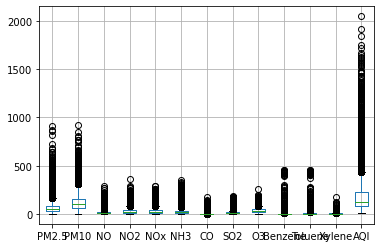

In [9]:
print(dataset.boxplot())

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



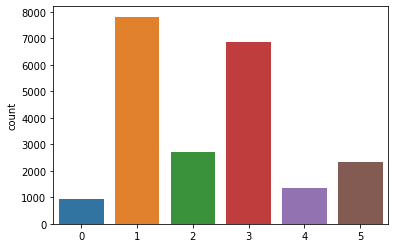

In [11]:
ax = sns.countplot(y)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



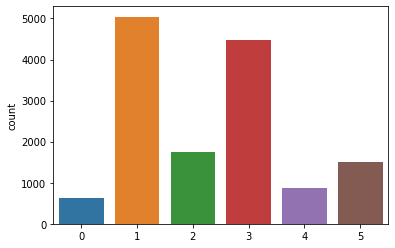

In [12]:
ax = sns.countplot(y_train)

In [20]:
print('Classes and number of values in trainset',Counter(y_train))
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))
med=np.median(x_train,axis=0)

Classes and number of values in trainset Counter({1: 5042, 3: 4478, 2: 1736, 5: 1503, 4: 883, 0: 617})


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing i

Classes and number of values in trainset after SMOTE: Counter({2: 5042, 1: 5042, 3: 5042, 4: 5042, 0: 5042, 5: 5042})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



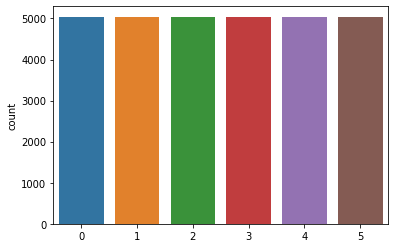

In [21]:
sns.countplot(y_train)

In [13]:
classlabels=['Good','Moderate','Poor','Satisfactory','Severe','Very Poor']
import itertools
def plot_confusion_matrix(cm,title, classes=classlabels,
                          cmap=plt.cm.Blues):

    plt.figure(figsize=(5,4.8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

#     print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The accuracy of this model is :  99.92185464964834
Precision :  99.92185464964834
Recall :  99.92185464964834
F1 Score :  99.92185464964834


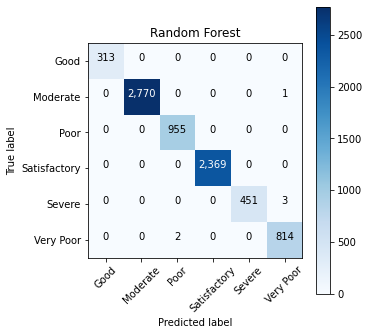

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,random_state = 0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,title="Random Forest")

a = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')        
f1 = f1_score(y_test,y_pred, average='micro')
print("The accuracy of this model is : ", a*100)
print("Precision : ",precision*100)
print("Recall : ",recall*100)
print("F1 Score : ",f1*100)

The accuracy of this model is :  100.0
Precision :  100.0
Recall :  100.0
F1 Score :  100.0


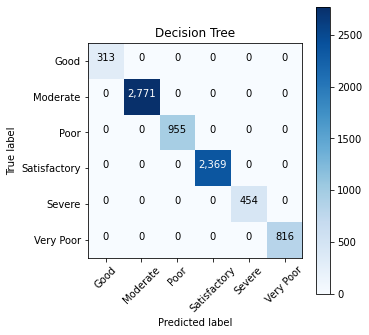

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,title="Decision Tree")

a = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')        
f1 = f1_score(y_test,y_pred, average='micro')
print("The accuracy of this model is : ", a*100)
print("Precision : ",precision*100)
print("Recall : ",recall*100)
print("F1 Score : ",f1*100)

In [16]:
res = []
city = le_X_city.fit_transform(["Pune"])
date = le_X_date.fit_transform(["12/12/2020"])
ls = [city[0] ,date[0], 83.13, 101.555, 6.93, 28.71, 33.72, 18.42, 6.93, 49.52, 59.76, 0.02, 0.0, 3.14, 209.0]
lst = []
lst.append(ls)
temp = le_Y.inverse_transform(clf.predict(lst))
temp = temp.tolist()
res.append(temp[0])
        
temp = le_Y.inverse_transform(dt.predict(lst))
temp = temp.tolist()
res.append(temp[0])
        
print("Random Forest : ",res[0])
print("Decision Tree : ",res[1])

Random Forest :  Poor
Decision Tree :  Poor


In [19]:
res = []
city = le_X_city.fit_transform(["Patna"])
date = le_X_date.fit_transform(["12/12/2020"])
ls = [city[0] ,date[0],49.34,0,20.33,26.7,21.5,0,0.91,49.93,49.47,1.43,16.43,5.49,94]
lst = []
lst.append(ls)
temp = le_Y.inverse_transform(clf.predict(lst))
temp = temp.tolist()
res.append(temp[0])
        
temp = le_Y.inverse_transform(dt.predict(lst))
temp = temp.tolist()
res.append(temp[0])
        
print("Random Forest : ",res[0])
print("Decision Tree : ",res[1])

Random Forest :  Satisfactory
Decision Tree :  Satisfactory
